In [1]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pylab import figure, scatter, show
%matplotlib inline

In [2]:
#Import data
zone = gpd.read_file('LSOA1.shp')
zone = zone.to_crs(epsg=27700)

In [3]:
df = zone
wq = lps.weights.Queen.from_dataframe(df)# Use Quuen-style adjacency matrix
wq.transform = 'r' # Normalization matrix

In [4]:
centroids = zone.geometry.centroid # Calculate the geometric center of the polygon

In [5]:
wr = lps.weights.Rook.from_dataframe(df) # Use Rook's adjacency matrix
# wr.transform = 'r' # Normalization matrix

In [6]:
y=zone["fire"]
mi = esda.moran.Moran(y, wq)
print("Moran's I is：",mi.I)
print("The Z test value under the assumption of random distribution is：",mi.z_rand)
print("The P value of the Z test under the assumption of random distribution is：",mi.p_rand)
print("The Z test value under the normal distribution assumption is：",mi.z_norm)
print("The P value of the Z test under the normal distribution assumption is：",mi.p_norm)

Moran's I is： 0.26915435510176683
The Z test value under the assumption of random distribution is： 31.644282772557688
The P value of the Z test under the assumption of random distribution is： 0.0
The Z test value under the normal distribution assumption is： 31.632682942109057
The P value of the Z test under the normal distribution assumption is： 0.0


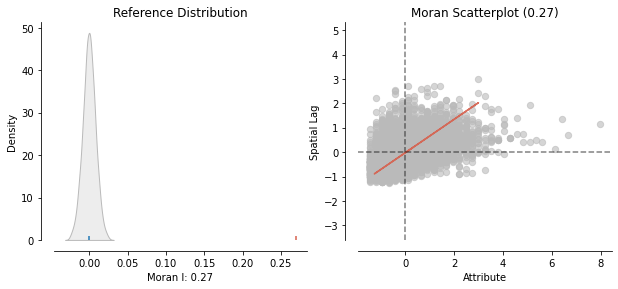

In [7]:
from splot.esda import plot_moran
plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

In [8]:
import esda  
import numpy as np
import pandas as pd
import libpysal as lps
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point
from pylab import figure, scatter, show
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import plot_moran
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation

%matplotlib inline

In [9]:
y = zone['fire'].values
w = lps.weights.distance.Kernel.from_dataframe(zone, fixed=False, k=15)
w.transform = 'r'

In [10]:
moran_loc = Moran_Local(y, w)

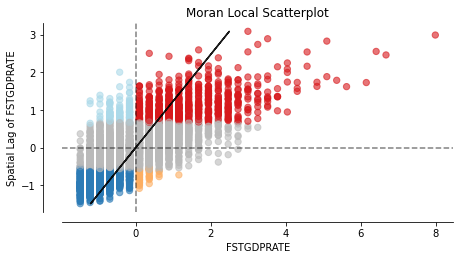

In [11]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('FSTGDPRATE')
ax.set_ylabel('Spatial Lag of FSTGDPRATE')
plt.show()

In [12]:
# import packages needed 
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import mapclassify as mc
import shapely as shp
from legendgram import legendgram
import palettable.matplotlib as palmpl
import esda
import libpysal as lps
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR
import libpysal as ps

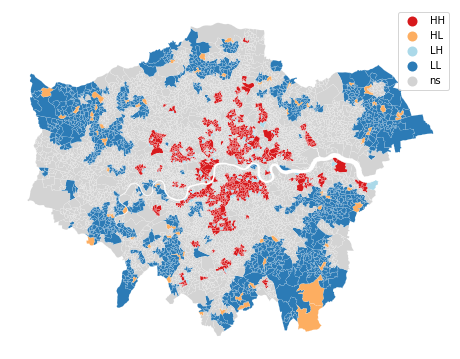

In [13]:
lisa_cluster(moran_loc, zone, p=0.05, figsize = (8,8))
plt.savefig('14.png', dpi=300, pad_inches=0, bbox_inches='tight')
plt.show()
